# Regressão Linear 📈 - Exercícios

Vamos exercitar os conceitos de regressão linear aprendidos até aqui. Para isso, vamos utilizar o *dataset* Load_Diabetes, que é uma ferramenta bem conhecida para análises relacionadas à diabetes e modelagem de regressão linear e é comumente utilizada em tarefas de aprendizado de máquina e estatísticas para estudar a progressão da diabetes em pacientes.

**O que é o Banco de Dados Load_Diabetes**

O *dataset* Load_Diabetes contém informações de saúde de pacientes com diabetes, incluindo variáveis demográficas e clínicas, bem como uma medida quantitativa da progressão da doença um ano após o início do estudo. As variáveis incluem idade, sexo, índice de massa corporal (IMC), pressão sanguínea média e seis medições séricas.

**E como acessá-lo?**

Para acessar o *dataset* Load_Diabetes em Python, você pode utilizar a biblioteca scikit-learn. Primeiro, você deve importar a biblioteca e, em seguida, carregar o conjunto de dados da seguinte maneira:
  
  ```python
  from sklearn.datasets import load_diabetes

  # Carregar o conjunto de dados Diabetes
  diabetes = load_diabetes()

  # Criar o DataFrame
  df = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['Progression'])
  ```

Uma vez carregado, você terá acesso a todas as informações do conjunto de dados, incluindo as variáveis independentes e a variável de destino (progressão da diabetes), que podem ser usadas para análises e modelagem.

**Aviso Importante**
É importante notar que o conjunto de dados Diabetes, utilizado neste exercício, já foi previamente padronizado (standardizado). Isso significa que as variáveis independentes passaram por um processo de transformação em que a média de cada variável foi subtraída de cada valor e o resultado foi dividido pelo desvio padrão da variável. Portanto, todas as variáveis agora têm uma média igual a zero e um desvio padrão igual a um.

Neste exercício, exploraremos como realizar uma análise de regressão linear simples usando este *dataset* para prever a progressão da diabetes com base em uma das variáveis independentes, como o IMC. Você aprenderá como preparar os dados, construir um modelo de regressão e avaliar seus resultados.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carrega o dataset
diabetes = load_diabetes()

# Cria o dataframe
df = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['Progression'])

# Visualiza informações sobre o dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [18]:
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Investigue as correlações entre as variáveis do dataset através do método `corr()` do Pandas.

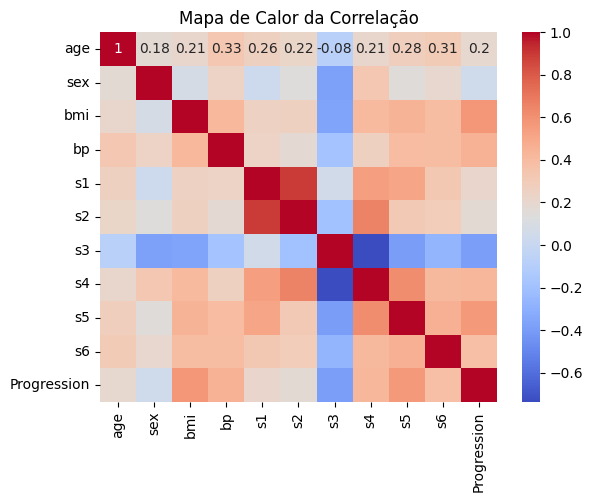

In [25]:
# Calcular e visualizar a matriz de correlação
correlation_matrix = df.corr()

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
heatmap.set_title('Mapa de Calor da Correlação');


A partir do gráfico de correlação, escolha uma variável independente e a utilize para construir um modelo de regressão linear simples.

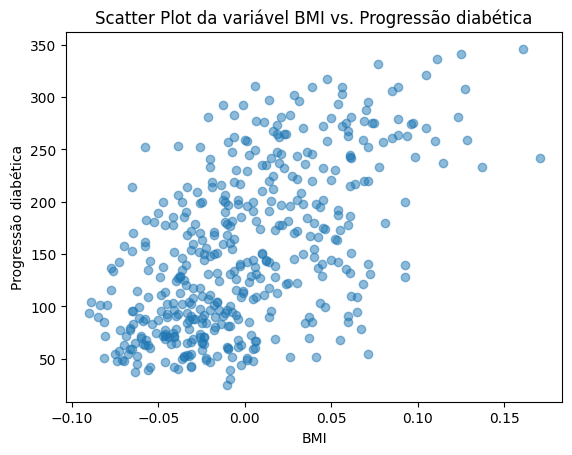

In [40]:
# Vamos investir a relação entre as variáveis 'bmi' e 'Progression'
# Scatter plot of BMI vs. Progression
plt.scatter(df['bmi'], df['Progression'], alpha=0.5)
plt.title('Scatter Plot da variável BMI vs. Progressão diabética')
plt.xlabel('BMI')
plt.ylabel('Progressão diabética')
plt.show()


Verifique por outliers e os remova do conjunto de dados.

In [41]:
# Define uma função para detectar e remover os outliers
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Especifica as colunas que estamos estudando ('BMI' and 'Progression')
columns_to_check = ['bmi', 'Progression']

# Remove outliers from selected columns
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

# Visualiza o dataframe alterado
print(df.describe())


              age         sex         bmi          bp          s1          s2  \
count  439.000000  439.000000  439.000000  439.000000  439.000000  439.000000   
mean     0.000236   -0.000129   -0.001067    0.000109   -0.000096   -0.000104   
std      0.047672    0.047611    0.045973    0.047717    0.047700    0.047721   
min     -0.107226   -0.044642   -0.090275   -0.112399   -0.126781   -0.115613   
25%     -0.034575   -0.044642   -0.034768   -0.036656   -0.034592   -0.030437   
50%      0.005383   -0.044642   -0.007284   -0.005670   -0.004321   -0.003819   
75%      0.038076    0.050680    0.030440    0.035644    0.027326    0.028905   
max      0.110727    0.050680    0.128521    0.132044    0.153914    0.198788   

               s3          s4          s5          s6  Progression  
count  439.000000  439.000000  439.000000  439.000000   439.000000  
mean     0.000255   -0.000319   -0.000302   -0.000210   151.302961  
std      0.047672    0.047603    0.047614    0.047697    76.577

Crie um gráfico de regressão, usando a biblioteca Seaborn, para visualizar a relação entre a variável independente escolhida e a variável dependente 'Progression'.

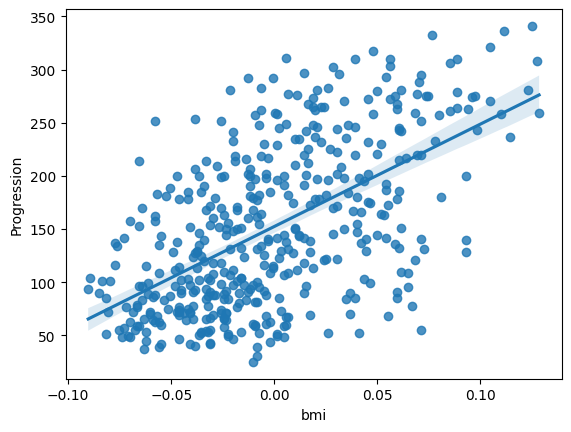

In [46]:
#O gráfico resultante mostrará os pontos de dados de 'BMI' vs. 'Progression'
#com uma linha de regressão que representa a tendência geral entre essas duas variáveis.
#Isso ajuda a visualizar como o índice de massa corporal (BMI) se relaciona com a progressão da diabetes.

ax = sns.regplot(df, y='Progression', x='bmi')

#RA área sombreada ao redor da linha de regressão representa o intervalo de confiança, ou seja,
# a incerteza ou variabilidade nos valores previstos de Y em cada valor de X. Ela significa a faixa
# na qual podemos ter confiança razoável de que a verdadeira linha de regressão está localizada.
# Em outras palavras, fornece uma ideia de quão certo ou incerto é nosso estimativa de regressão.
# Se a região sombreada for estreita, isso indica que o modelo está relativamente certo sobre suas previsões.
#Se a região sombreada for ampla, sugere que o modelo está menos certo e há mais variabilidade nos valores previstos de Y.


Construa um modelo de regressão linear simples para prever a progressão da diabetes com base na variável independente escolhida e interprete os seus resultados.

In [44]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X = sm.add_constant(df['bmi'])  # Variável independente BMI
y = df['Progression']  # Variável dependente Progression

# Cria o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Imprime o sumário do modelo gerado
print(model.summary())

# Realiza a predição
y_pred = model.predict(X)

# Calcula e imprime o R2
r2 = r2_score(y, y_pred)

print(f'R-squared: {r2:.2f}')


                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     219.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.65e-40
Time:                        10:43:48   Log-Likelihood:                -2437.6
No. Observations:                 439   AIC:                             4879.
Df Residuals:                     437   BIC:                             4887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3308      2.986     51.008      0.0

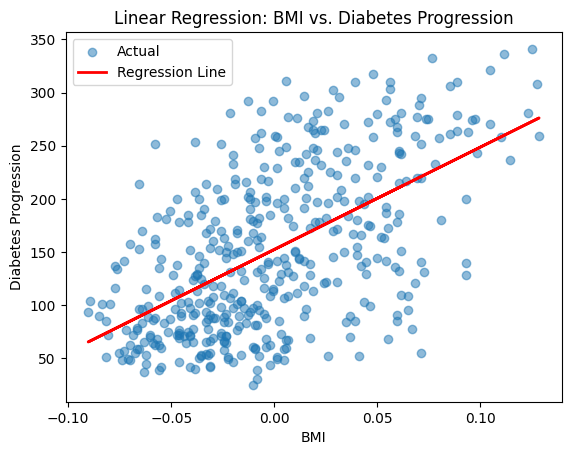

In [45]:
#Visualisa o resultado da regressão
plt.scatter(X['bmi'], y, alpha=0.5, label='Actual')
plt.plot(X['bmi'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: BMI vs. Diabetes Progression')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()
